In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

## function

In [91]:
def nanfill(data,row, column):
    tag = data.iloc[row,1]
    # print(data[data.iloc[:,1] == tag].iloc[:,column],'\n')
    temp = data[data.iloc[:,1] == tag].iloc[:,column]
    temp = np.average(temp[temp.notna()])
    if (pd.isna(temp)):
        print(row,column)
    data.iloc[row,column] = temp

def normalization(data):
    for i in range(data.shape[1]):
        m1 = min(data.iloc[:,i])
        m2 = max(data.iloc[:,i])
        data = (data.iloc[:,i] - m1) / (m2 - m1)

# 计算交叉验证结果的均值和标准差， 默认为五折交叉验证，结果为相关系数R2      
def cross_validate(models, cv = 5, scoring = 'r2'):
    means = []
    stds = []
    
    for index, model in enumerate(models):
        score = cross_val_score(model, X_train, y_train, cv = cv, scoring = scoring)
        means.append(score.mean())
        stds.append(score.std(ddof = 1))
    return means, stds


def plot_errbar(c_list, means, stds):
    print('means:', means)
    print('stds:', stds)
    plt.errorbar(c_list, means, yerr=stds, c='#06d6a0')
    plt.xlabel('Alpha')
    plt.ylabel('Accuracy')
    plt.show()

## Data import

In [3]:
raw_data = pd.read_csv('Data.csv')

for i in range(3):
    for j in range(raw_data.shape[0]):
        raw_data.iloc[j,i+2] = np.float64(raw_data.iloc[j,i+2].replace(',',''))
        
for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        if (pd.isna(raw_data.iloc[i,j])):
            nanfill(raw_data,i,j)

## Analysis of Correlation

In [ ]:
group = [['LACCESS_POP15','LACCESS_LOWI15','LACCESS_HHNV15','LACCESS_CHILD15','LACCESS_SENIORS15'],
        ['GROCPTH16', 'SUPERCPTH16', 'CONVSPTH16', 'SPECSPTH16', 'WICSPTH16'],
        ['FFRPTH16', 'FSRPTH16'],
        ['FOODINSEC_15_17', 'VLFOODSEC_15_17'],
        ['FMRKT_WIC18', 'FMRKT_WICCASH18'],
        ['POVRATE15', 'CHILDPOVRATE15']]

In [ ]:
for i in range(len(group)):
    corr = raw_data[group[i]].corr()
    plt.figure(figsize = (12,8), dpi = 300)
    sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
    plt.savefig('corr_heatmap_{}.jpg'.format(i))

## Data preprocessing

In [4]:
preserve_columns = ['County','State','Population_Estimate_2016','LACCESS_POP15','GROCPTH16',
                    'SUPERCPTH16','CONVSPTH16','SPECSPTH16','WICSPTH16','FFRPTH16','FSRPTH16',
                    'FOODINSEC_15_17','FMRKT_WIC18','POVRATE15','PCT_WIC17']
raw_data = raw_data[preserve_columns]
raw_data['PCT_WIC17'] = raw_data['PCT_WIC17'] * raw_data['Population_Estimate_2016']
raw_data['FOODINSEC_15_17'] = raw_data['FOODINSEC_15_17'] * raw_data['Population_Estimate_2016']
raw_data['POVRATE15'] = raw_data['POVRATE15'] * raw_data['Population_Estimate_2016']

# for i in range(raw_data.shape[1]-2):
#     plt.figure(figsize = (12,8), dpi = 300)
#     plt.plot(range(raw_data.shape[0]), raw_data.iloc[:,i+2])
#     print(preserve_columns[i+2])



In [5]:
enc = TargetEncoder(cols = ['State']).fit(raw_data['State'],raw_data['PCT_WIC17'])
raw_data['State'] = enc.transform(raw_data['State'])

c:\Software\Conda\envs\py38\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\Software\Conda\envs\py38\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [6]:
data = raw_data.sample(frac = 1).values
X_train = np.float64(data[:2512,1:-1])
y_train = np.float64(data[:2512,-1])
X_test = np.float64(data[2512:,1:-1])
y_test = np.float64(data[2512:,-1])

## Ridge

In [70]:
# 由于和lasso以及ElasticNet差不多，因此在此暂不考虑

# Ridge_clfs = []
# ridge_accuracy = []
# ridge_accuracy_std = []

# for i in range(5):
#     clf = KernelRidge(alpha = 10 ** (i - 2), kernel = 'linear')
#     Ridge_clfs.append(clf)

# means1, stds1 = cross_validate(Ridge_clfs)
# plot_errbar([0.01, 0.1, 1, 10, 100], means1, stds1)

In [71]:
# Ridge_clfs = []
# for i in range(5):
#     clf = KernelRidge(alpha = 10 ** (i - 2), kernel = 'sigmoid')
#     Ridge_clfs.append(clf)
# means2, stds2 = cross_validate(Ridge_clfs)
# plot_errbar([0.01, 0.1, 1, 10, 100], means2, stds2)

In [73]:
# Ridge_clfs = []
# for i in range(5):
#     clf = KernelRidge(alpha = 10 ** (i - 2), kernel = 'rbf')
#     Ridge_clfs.append(clf)
# means3, stds3 = cross_validate(Ridge_clfs)
# plot_errbar([0.01, 0.1, 1, 10, 100], means3, stds3)

## Lasso

In [74]:
# 由于和Ridge以及ElasticNet差不多，因此在此暂不考虑

# Lasso_clfs = []
# for i in range(5):
#     clf = Lasso(alpha = 10 ** (i - 2), max_iter = 5000, random_state = 913)
#     Lasso_clfs.append(clf)
# means_lasso, stds_lasso = cross_validate(Lasso_clfs)
# plot_errbar([0.01, 0.1, 1, 10, 100], means_lasso, stds_lasso)

## Elastic Net

In [84]:
# ElasticNet_clfs = []
# l1_ratio = [0.25,0.5,0.75]
# for i in range(3):
#     same_ratio = []
#     for j in range(5):
#         clf = ElasticNet(alpha = 10 ** (i - 2), l1_ratio = l1_ratio[i], random_state = 913, max_iter = 5000)
#         same_ratio.append(clf)
#     ElasticNet_clfs.append(clf)
    
#     mean_ela, std_ela = cross_validate(same_ratio)
#     plot_errbar([0.01, 0.1, 1, 10, 100], mean_ela, std_ela)
    
# mean_ela, std_ela = cross_validate(ElasticNet_clfs)

In [83]:
encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.001), l1_ratio=(0.25, 0.5, 0.75, 0.9), normalize=True)
encv.fit(X_train, y_train)
print('ElasticNet optimal alpha: %.3f and L1 ratio: %.4f' % (encv.alpha_, encv.l1_ratio_))

ElasticNet optimal alpha: 0.001 and L1 ratio: 0.9000


D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.060261870031823e+25, tolerance: 8.680488285005667e+24
  model = cd_fast.enet_coordinate_descent_gram(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ra

D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.701e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.699e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.696e+26, tolerance: 8.762e+24
  

means: [0.8579628571239674, 0.8579277165769679, 0.8578592334639288, 0.8577995327569287]
stds: [0.10104514445963839, 0.10106940502553888, 0.1011367816673618, 0.10120066300728478]


D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.414e+26, tolerance: 8.736e+24
  model = cd_fast.enet_coordinate_descent(


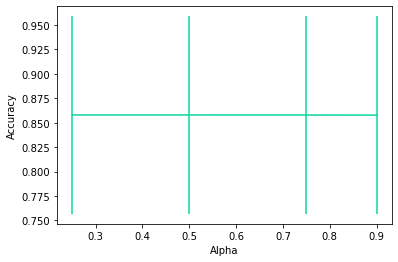

D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.692e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(


best ratio 0.25
best score 0.8579628571239674


D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.691e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.690e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+26, tolerance: 8.762e+24
  

means: [0.8577910355996717, 0.857785098053838, 0.857784103808093, 0.8577882802587687]
stds: [0.10120923022273591, 0.10121420650665047, 0.10121183367988569, 0.1012023451917005]


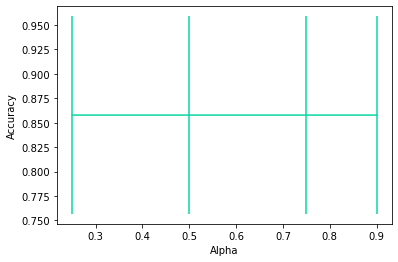

D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.691e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(


best ratio 0.25
best score 0.8577910355996717


D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.690e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.690e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+26, tolerance: 8.762e+24
  

means: [0.8577837610740605, 0.8577841038080954, 0.8577871085602815, 0.8577919469226343]
stds: [0.10121432180970183, 0.10121183367988203, 0.10120479935784504, 0.10119492349762779]


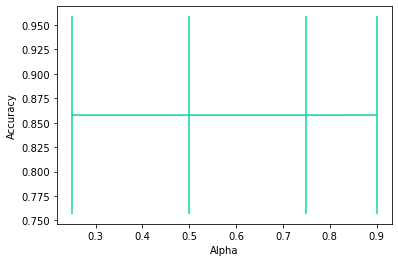

D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(


best ratio 0.9
best score 0.8577919469226343


D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+26, tolerance: 8.762e+24
  model = cd_fast.enet_coordinate_descent(
D:\Program\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+26, tolerance: 8.762e+24
  

means: [0.8577898185548742, 0.8577919469226325, 0.8577951494387932, 0.8577980005932719]
stds: [0.10119919916165855, 0.10119492349762964, 0.1011885080604315, 0.10118261899597508]


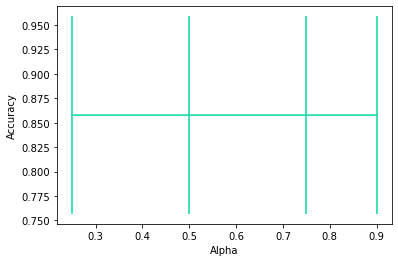

best ratio 0.9
best score 0.8577980005932719


In [90]:
alphas = [0.1, 0.01, 0.005, 0.001]
l1_ratio = [0.25, 0.5, 0.75, 0.9]

mean_ela = []
std_ela = []

for i, alpha in enumerate(alphas):
    mean_list = []
    std_list = []
    ElasticNet_clfs = []

    for radio in l1_ratio:
        model = ElasticNet(alpha=alpha, l1_ratio=radio, random_state=1212, max_iter=5000).fit(X_train, y_train)
        ElasticNet_clfs.append(model)

    mean_tep, std_tmp = cross_validate(ElasticNet_clfs)
    plot_errbar(l1_ratio, mean_tmp, std_tmp)
    
    mean_ela.append(mean_ela)
    std_ela.append(std_ela)
    
print("best ratio", l1_ratio[best_index])
print("best score", mean_ela[best_index])

## Decision tree

means: [0.7370516320556437, 0.7570725617372623, -62.56389099530014, 0.7980186668428936]
stds: [0.21033262166820602, 0.26110548681041545, 141.25387602067448, 0.2278358972306396]


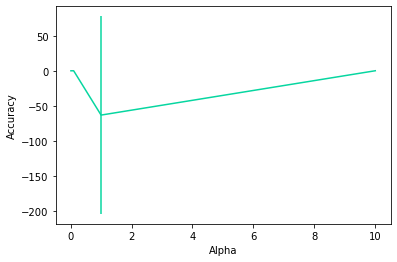

In [50]:
DecisionTrees = []
clf = DecisionTreeRegressor(criterion = 'squared_error', random_state = 913)
DecisionTrees.append(clf)
clf = DecisionTreeRegressor(criterion = 'friedman_mse', random_state = 913)
DecisionTrees.append(clf)
clf = DecisionTreeRegressor(criterion = 'absolute_error', random_state = 913)
DecisionTrees.append(clf)
clf = DecisionTreeRegressor(criterion = 'poisson', random_state = 913)
DecisionTrees.append(clf)
means_dt, stds_dt = cross_validate(DecisionTrees)
plot_errbar([0.01, 0.1, 1, 10], means_dt, stds_dt)

## NN

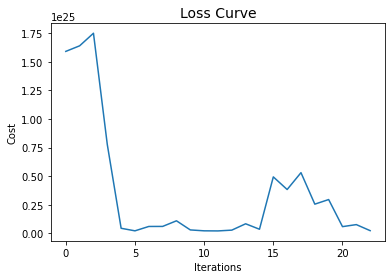

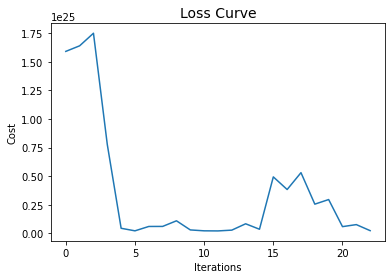

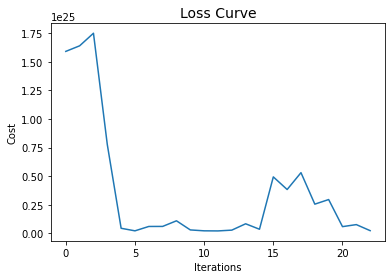

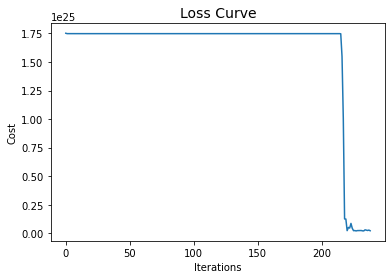

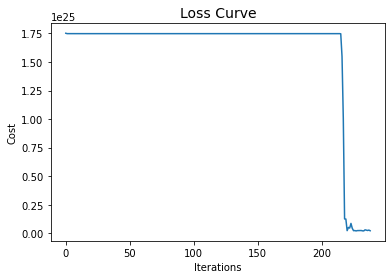

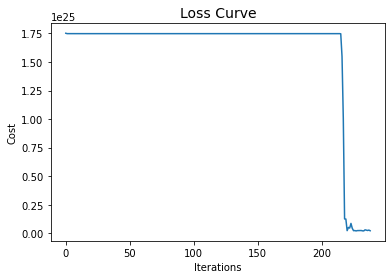

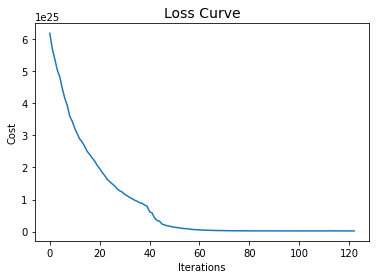

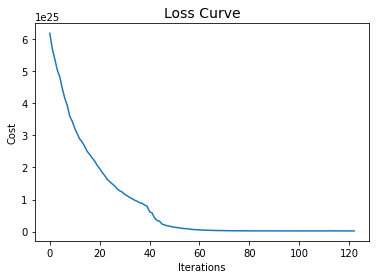

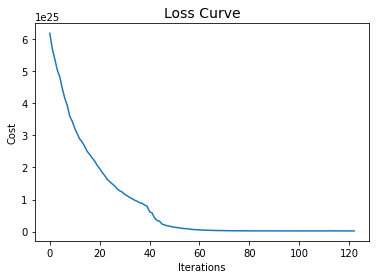

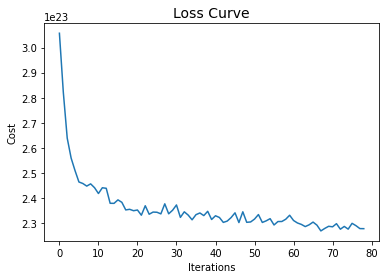

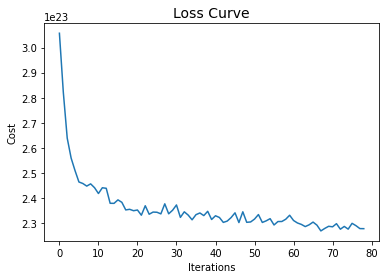

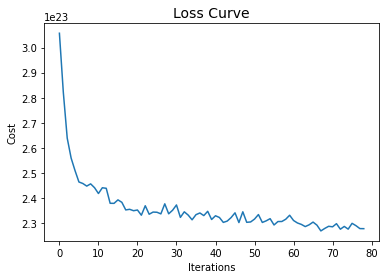

CPU times: total: 1min 21s
Wall time: 1min 17s


In [53]:
%%time
NNs = []
size_list = [(64,8),(64,16,4),(128,16),(128,32,8)]
for i in range(len(size_list)):
    NN_same_size = []
    for j in range(3):
        clf = MLPRegressor(hidden_layer_sizes = size_list[i], learning_rate_init = 10 ** (-i - 2),
                           random_state = 913, max_iter = 2000)
        clf.fit(X_train, y_train)
        NN_same_size.append(clf)
        
        plt.plot(clf.loss_curve_)
        plt.title("Loss Curve", fontsize=14)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
    NNs.append(NN_same_size)

means = []
stds = []
for i in range(len(NNs)):
    mean, std = cross_validate(NNs[i])
    means.append(mean)
    std.append(std)